# Series de tiempo

Ejemplo de preprocesamiento y pruebas estadísticas sobre series de tiempo

Carga de los datos

In [97]:
import pandas as pd

In [98]:
archivo = r'C:\Users\josea\Downloads\^SPX(2).csv'

In [99]:
datossp = pd.read_csv(archivo)

In [100]:
datossp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-06,2840.290039,2853.290039,2835.979980,2850.399902,2850.399902,2879020000
1,2018-08-07,2855.919922,2863.429932,2855.919922,2858.449951,2858.449951,3185440000
2,2018-08-08,2856.790039,2862.439941,2853.090088,2857.699951,2857.699951,2978070000
3,2018-08-09,2857.189941,2862.479980,2851.979980,2853.580078,2853.580078,3066180000
4,2018-08-10,2838.899902,2842.199951,2825.810059,2833.280029,2833.280029,3265590000
...,...,...,...,...,...,...,...
1504,2024-07-30,5478.729980,5489.459961,5401.700195,5436.439941,5436.439941,3777740000
1505,2024-07-31,5505.589844,5551.509766,5493.750000,5522.299805,5522.299805,4546910000
1506,2024-08-01,5537.839844,5566.160156,5410.419922,5446.680176,5446.680176,4703620000
1507,2024-08-02,5376.629883,5383.890137,5302.029785,5346.560059,5346.560059,5156450000


In [101]:
datossp.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [102]:
datossp['Date'] = pd.to_datetime(datossp['Date'])

In [103]:
datossp.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [104]:
sp500 = pd.Series(data=datossp['Adj Close'].values,index=datossp['Date'])

sp500

Date
2018-08-06    2850.399902
2018-08-07    2858.449951
2018-08-08    2857.699951
2018-08-09    2853.580078
2018-08-10    2833.280029
                 ...     
2024-07-30    5436.439941
2024-07-31    5522.299805
2024-08-01    5446.680176
2024-08-02    5346.560059
2024-08-05    5186.330078
Length: 1509, dtype: float64

Forma alternativa

In [106]:
sp500 = datossp['Adj Close']
sp500.index = datossp['Date']
sp500

Date
2018-08-06    2850.399902
2018-08-07    2858.449951
2018-08-08    2857.699951
2018-08-09    2853.580078
2018-08-10    2833.280029
                 ...     
2024-07-30    5436.439941
2024-07-31    5522.299805
2024-08-01    5446.680176
2024-08-02    5346.560059
2024-08-05    5186.330078
Name: Adj Close, Length: 1509, dtype: float64

Graficar

<Axes: xlabel='Date'>

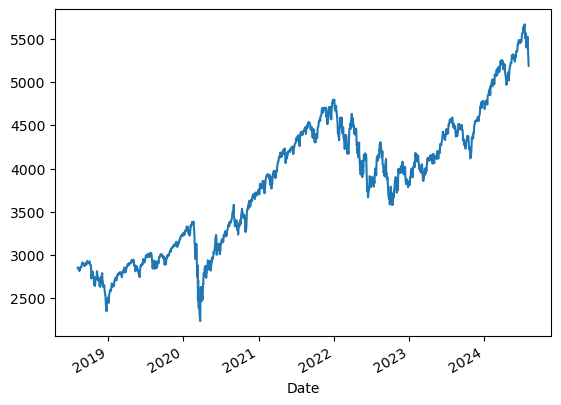

In [108]:
sp500.plot()

In [109]:
from statsmodels.graphics.tsaplots import plot_acf

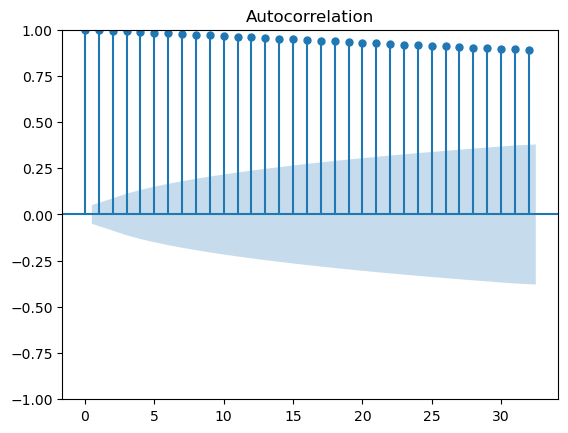

In [110]:
plot_acf(sp500);

In [111]:
import numpy as np

In [112]:
dsp500 = np.log(sp500).diff().dropna()

In [113]:
dsp500

Date
2018-08-07    0.002820
2018-08-08   -0.000262
2018-08-09   -0.001443
2018-08-10   -0.007139
2018-08-13   -0.004014
                ...   
2024-07-30   -0.004973
2024-07-31    0.015670
2024-08-01   -0.013788
2024-08-02   -0.018553
2024-08-05   -0.030427
Name: Adj Close, Length: 1508, dtype: float64

<Axes: xlabel='Date'>

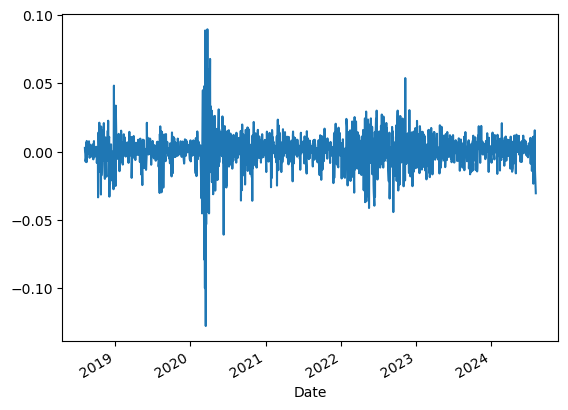

In [114]:
dsp500.plot()

In [115]:
ndata = len(dsp500)
ndata

1508

In [116]:
valor_limite = 3 * dsp500.std()
valor_limite

0.03883141007216706

In [117]:
sum(dsp500 > valor_limite)

10

In [118]:
lim_sup=(sum(dsp500>valor_limite)+1)/ndata
lim_inf=(sum(dsp500<-valor_limite)+1)/ndata

In [119]:
lim_sup

0.007294429708222812

In [120]:
from scipy.stats.mstats import winsorize

In [121]:
dsp500 = pd.Series(winsorize(dsp500,limits = (lim_inf,lim_sup)),index = dsp500.index)

<Axes: xlabel='Date'>

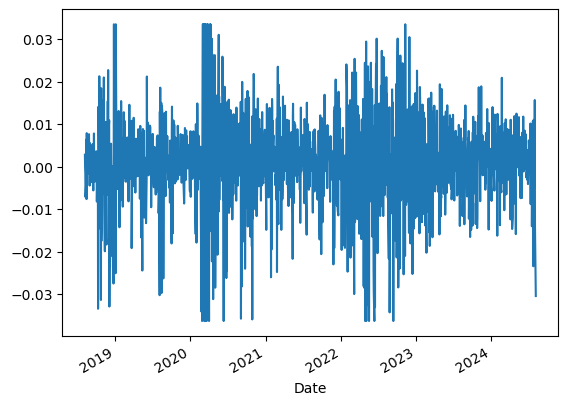

In [122]:
dsp500.plot()

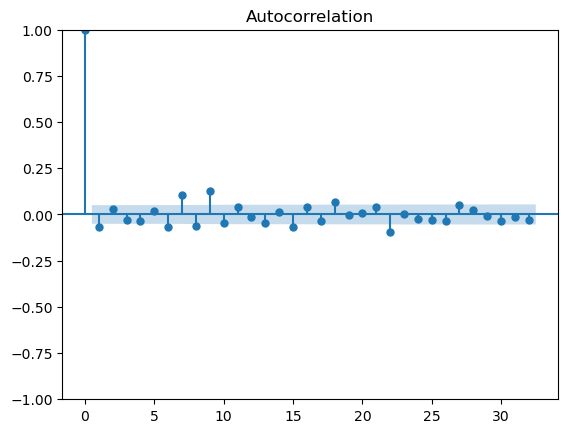

In [123]:
plot_acf(dsp500);

In [124]:
from statsmodels.tsa.stattools import adfuller

Prueba aumentada de Dickey-Fuller

- $H_0$: La serie tiene raíz unitaria (no es estacionaria)
- $H_1$: La serie no tiene raíz unitaria (es estacionaria)

Para que $H_0$ se cumpla, el valor del estadístico tiene que ser menor al valor crítico. O el $p-$valor debe ser mayor al nivel de significancia.

In [128]:
dftest = adfuller(dsp500, regression = 'c', autolag="AIC")
dftest

(-11.709834544033248,
 1.4981720965860288e-21,
 8,
 1499,
 {'1%': -3.4347199356122493,
  '5%': -2.86347004827819,
  '10%': -2.567797534300163},
 -9139.068116300341)

In [129]:
dftest[1]

1.4981720965860288e-21

In [130]:
from statsmodels.tsa.stattools import kpss

Prueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

- $H_0$: La serie es estacionaria
- $H_1$: La serie no es estacionaria

In [132]:
dftest = kpss(dsp500, regression = 'c')
dftest

C:\Users\josea\AppData\Local\Temp\ipykernel_26932\852556448.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  dftest = kpss(dsp500, regression = 'c')


(0.059431669147255624,
 0.1,
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [165]:
import seaborn as sns

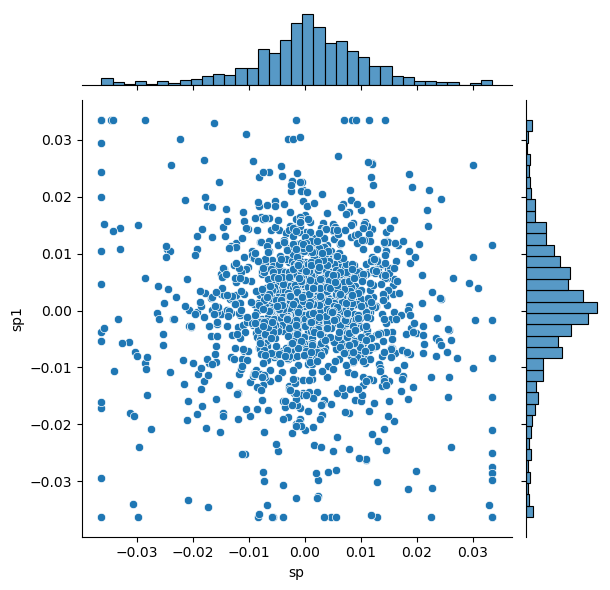

In [168]:
sns.jointplot(datal,x='sp',y='sp1')